In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from scipy.sparse.csgraph import minimum_spanning_tree
import math


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from modules.dp_bounds import dp_bounds



In [3]:
sample_sizes = np.logspace(2, 3.3, 7 , endpoint = True, dtype = int)

sample_sizes

array([ 100,  164,  271,  446,  735, 1211, 1995])

In [4]:
# Set the mean and covariance matrix for each Gaussian distribution

mean1 = [0, 0, 0 , 0 , 0, 0, 0 , 0]
# covariance1 = np.ones((3,3))
covariance1 = np.identity(8)
# covariance1 = [[1, 0, 0],  [0, 1, 0], [0, 0, 0]

mean2 = [2.56, 0, 0 , 0, 0, 0,0, 0 ]
# mean2 = [math.sqrt(1/2), math.sqrt(1/2), 0]

# covariance2 = np.ones((3,3))
covariance2= np.identity(8)


MC_num = 400


In [8]:
dp_lst = []
for i in sample_sizes:
    n0, n1 = i, i
    params1  = [mean1, covariance1, n0]
    params2  = [mean2, covariance2, n1]
    
    dp_class = dp_bounds('mv_normal', params1, params2, MC_num,handle_errors= 'worst')
    dp_lst.append(dp_class)
    print("done with ", i)


done with  100
done with  164
done with  271
done with  446
done with  735
done with  1211
done with  1995


In [9]:
dx = 0.001
x = np.arange(-5, 5 + dx, dx)

f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
f1 = np.exp(-0.5 * (x - 2.56)**2) / np.sqrt(2 * np.pi)

fmin = np.minimum(f0, f1)

BER = 0.5 * np.sum(fmin * dx)

print("BER 2d:", BER)

BER 2d: 0.10027244449669406


In [10]:
BER_lst = np.ones(MC_num) * BER


def mse(l1, l2):## numpy lists
    return ((l1 - l2)**2).mean(axis=0)

In [11]:
lower_mse = []
upper_mse =[]
for obj in dp_lst:
    l_mse = mse(BER_lst, obj.get_bounds()[0]) 
    lower_mse.append(l_mse)
    
    u_mse = mse(BER_lst, obj.get_bounds()[1])
    upper_mse.append(u_mse)       


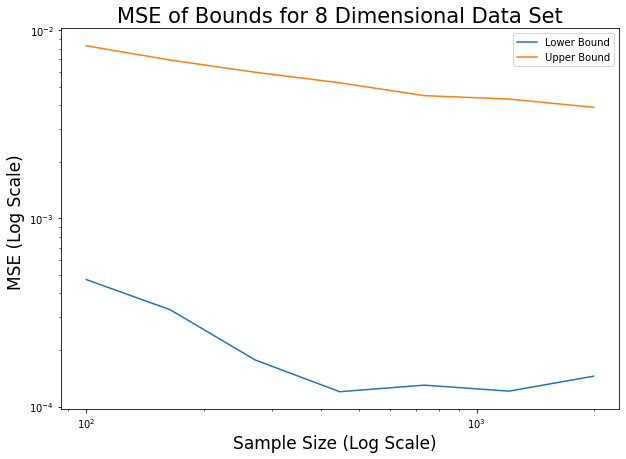

In [20]:
fs =17
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse, label='Lower Bound')
ax.plot(sample_sizes, upper_mse, label='Upper Bound')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MSE (Log Scale) ", fontsize=fs)
ax.set_title("MSE of Bounds for 8 Dimensional Data Set", fontsize = fs +4)
ax.legend()
plt.savefig("log_test.png",facecolor=(1,1,1,1))
# ax.set_xticks(sample_sizes)
plt.show()


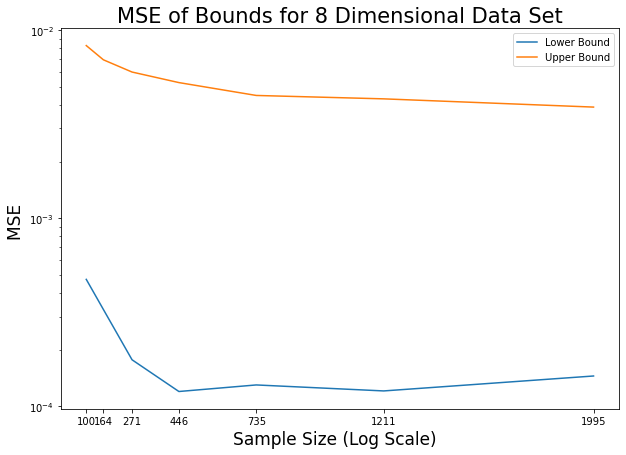

In [19]:
fs =17
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse, label='Lower Bound')
ax.plot(sample_sizes, upper_mse, label='Upper Bound')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MSE ", fontsize=fs)
ax.set_title("MSE of Bounds for 8 Dimensional Data Set", fontsize = fs +4)
ax.legend()
plt.savefig("test.png",facecolor=(1,1,1,1))
ax.set_xticks(sample_sizes)
plt.show()